In [7]:
import numpy as np
import pandas as pd 
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
goog_data = pd.read_csv('GOOG.csv', index_col='Date', parse_dates=True)

<h2> SMA Code(Longer method)   </h2>

<AxesSubplot:xlabel='Date', ylabel='Google Price in $'>

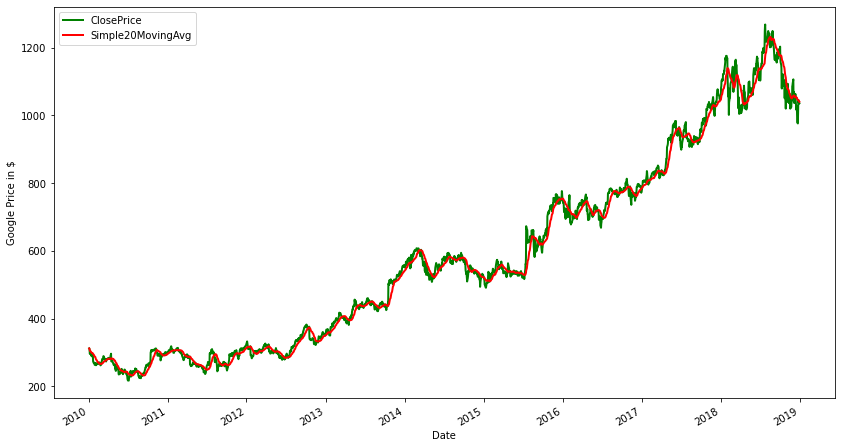

In [21]:
time_period = 20 #Number of days over which to avg
history = [] #History of prices
sma_values = [] #Simple moving avg values
close = goog_data['Close']

for close_price in close:
    history.append(close_price)
    if len(history) > time_period: #Remove the oldest price
        del(history[0])
    sma_values.append(stats.mean(history))
 

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Simple20MovingAvg=pd.Series(sma_values,index=goog_data.index))
close_price = goog_data['ClosePrice']
sma = goog_data['Simple20MovingAvg']

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111, ylabel='Google Price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)

<h2> SMA Code( Shorter Method)</h2>

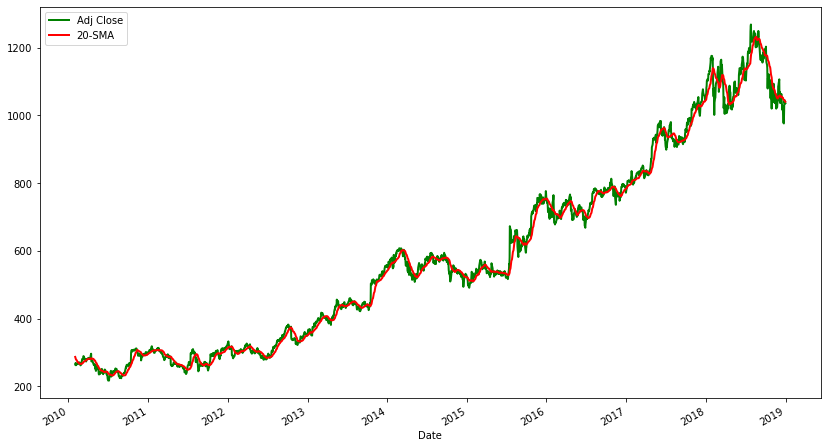

In [23]:
goog_data['20-SMA'] = goog_data['Adj Close'].rolling(20).mean()
goog_data['Adj Close'][20:].plot(label ='Adj Close',figsize=(14,8), color='g', lw=2.)
goog_data['20-SMA'].plot(label ='20-SMA', color='r', lw=2.)
plt.legend();
